<a href="https://colab.research.google.com/github/atenash/data-science-course/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

**Import Data**

In [3]:
data_taitanic=pd.read_csv('tested.csv')

**Data exploration**

In [4]:
data_taitanic.shape

(418, 12)

In [5]:
data_taitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_taitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Before cleaning the dataset let's look at the info on datatypes in the dataset using pandas.info() method. It will give us a concise summary of a DataFrame**

In [7]:
df=pd.DataFrame(data_taitanic)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Data visualization**

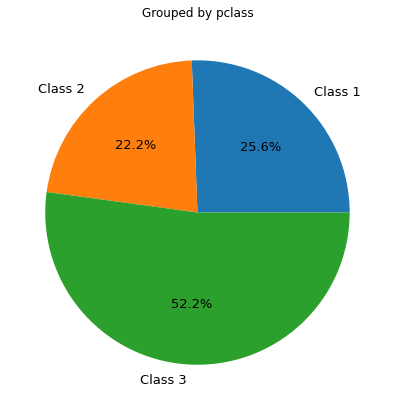

In [8]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

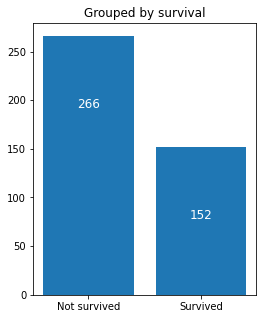

In [9]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

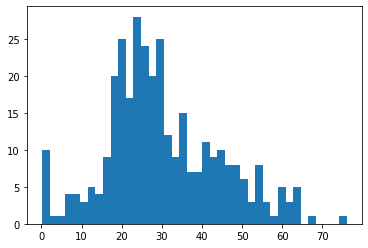

In [10]:
plt.hist(df['Age'], bins=40)
plt.show()

**Findig Null Values**

In [11]:
data_taitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Removing irrelevant columns**

In [12]:
cols = ['Name', 'Ticket', 'Cabin']
df.drop(cols, axis=1, inplace=True)

In [13]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

**Handling Missing Values in Age** 
We want to put mean values instead of null values in Age
We assume that older people often buy First class ticket, So we at first make a plot based on Age and Pclass 

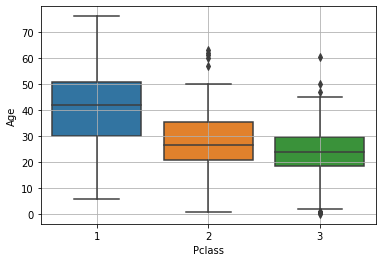

In [14]:
sns.boxplot(x="Pclass",y="Age", data=data_taitanic)
plt.grid()

In [15]:
age_pclass=df[['Age','Pclass']]

In [16]:
age_pclass1=age_pclass.loc[age_pclass['Pclass'] == 1]
age_pclass1

age_pclass2=age_pclass.loc[age_pclass['Pclass'] == 2]
age_pclass2

age_pclass3=age_pclass.loc[age_pclass['Pclass'] == 3]
age_pclass3

,Age,Pclass
0,34.5,3
1,47.0,3
3,27.0,3
4,22.0,3
5,14.0,3
...,...,...
412,28.0,3
413,NaN,3
415,38.5,3
416,NaN,3


**We calculate mean of Age for each Pclass**

In [17]:
mean1=age_pclass1['Age'].mean()
mean2=age_pclass2['Age'].mean()
mean3=age_pclass3['Age'].mean()

print(mean1)
print(mean2)
print(mean3)

40.91836734693877
28.7775
24.02794520547945


**We define a class for imputing Age values**

In [18]:
def impute_age(col):
  Age=col[0]
  Pclass=col[1]

  if (pd.isnull(Age)):
    if(Pclass==1):
      return mean1
    elif(Pclass==2):
      return mean2
    else:
      return mean3
  else:
    return Age

In [19]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

**Handling Missing Values in Fare** Since there is only one missing value in Fare column, we can remove it

In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**Creating Dummy Variables**

In [23]:
dummies = []
cols = ['Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [24]:
titanic_dummies = pd.concat(dummies, axis=1)

In [25]:
df = pd.concat((df,titanic_dummies), axis=1)

Now that we converted Embarked values into columns, we drop the redundant same column from the dataframe


In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,892,0,3,male,34.500000,0,0,7.8292,Q,0,1,0,1,0
1,893,1,3,female,47.000000,1,0,7.0000,S,1,0,0,0,1
2,894,0,2,male,62.000000,0,0,9.6875,Q,0,1,0,1,0
3,895,0,3,male,27.000000,0,0,8.6625,S,0,1,0,0,1
4,896,1,3,female,22.000000,1,1,12.2875,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,24.027945,0,0,8.0500,S,0,1,0,0,1
414,1306,1,1,female,39.000000,0,0,108.9000,C,1,0,1,0,0
415,1307,0,3,male,38.500000,0,0,7.2500,S,0,1,0,0,1
416,1308,0,3,male,24.027945,0,0,8.0500,S,0,1,0,0,1


In [27]:
df = df.drop(['Sex','Embarked'], axis=1)

In [28]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,1,12.2875,1,0,0,0,1


**Removing Outlier**
First for finding outlier we should visualize the data, for example, for Fare columns we draw a boxplot

<Axes: >

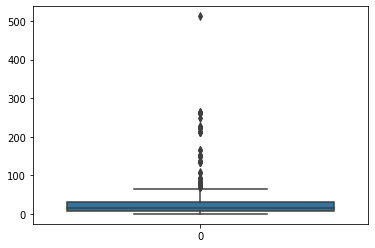

In [29]:
sns.boxplot(df['Fare'])

In [30]:
df['Fare'].max()

512.3292

In [31]:
df.drop(df[df['Fare'] == 512.3292].index, inplace = True)

<Axes: >

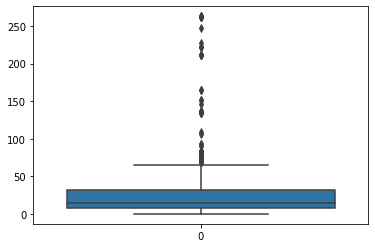

In [32]:
sns.boxplot(df['Fare'])

In [34]:
df['Fare'].min()

0.0

**Normalization**

In [125]:
df["Fare"] = (df["Fare"]-df["Fare"].min()) / (df["Fare"].max()-df["Fare"].min())
